<a href="https://colab.research.google.com/github/basnendarekop/data_mining/blob/main/3scene_ANN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
ls

 3scene/                                         Klasifikasi_Cancer_PCA.ipynb
 3scene_ANN_classification.ipynb                'klasifikasi daun.ipynb'
'Copy of Data_Cancer_Program_KNN_dan_DT.ipynb'   Klasifikasi_MNIST.ipynb
'Copy of dataset'/                               Klasifikasi_MNIST_new.ipynb
'Copy of kendaraan_cnn.ipynb'                    Latihan/
 data_cancer.csv                                 mnist_test.csv
 Data_Cancer_Program_KNN_dan_DT.ipynb            mnist_train.csv
 data_mining/                                    Multatuli.jpg
 dataset_daun/                                   Pertamina.jpg
'Dataset MNIST'/                                 RumahSakit.jpg
 kapal.ipynb                                     Tes.jpg
 KDA.jpg                                         TLD.jpg
 Klasifikasi_Cancer_FA.ipynb                     UAS/
 Klasifikasi_Cancer_LDA.ipynb                    Untitled0.ipynb


In [ ]:
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
#Loading dataset image
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [ ]:
# Loop untuk tiap output image
for imagePath in imagePaths:
	# mereduksi ukuran images menjadi 224x224 dan menskalakan ke range 0-1
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)

	# membuat label dari nama folder
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [ ]:
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Loading data set dan men-split menjadi training dan test data
# 75% untuk data training dan 25% untuk data test
print("[INFO] loading data...")
dataset = load_iris()
(trainX, testX, trainY, testY) = train_test_split(dataset.data, dataset.target, test_size=0.25)
# membuat label biner
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(trainY.shape)
print(testY.shape)
print(trainX.shape)
print(testX.shape)


[INFO] loading data...
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]
(112, 3)
(38, 3)
(112, 4)
(38, 4)


In [ ]:
# Menggunakan NN 4-3-3-3 dengan Keras
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation="sigmoid"))
model.add(Dense(3, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# training model dengan SGD
print("[INFO] training network...")
opt = SGD(lr=0.1, momentum=0.9, decay=0.1 / 250)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#early stopping agar training berhenti pada saat akurasi maksimal, model akan disimpan dalam file best_model_3scene.h5, nilai terbaik akan ditunggu dalam 100 epoch
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
mc = ModelCheckpoint('best_model_3scene.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
#traning dengan jumlah epoch 250 dengan tiap batch berjumlah 16, monitoring val_loss minimum dan val_accuracy maksimum untuk early stopping
hist = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=16, epochs=250, callbacks=[es, mc])

[INFO] training network...
Epoch 1/250
7/7 [==============================] - 1s 39ms/step - loss: 0.1188 - accuracy: 0.9593 - val_loss: 0.1353 - val_accuracy: 0.9211

Epoch 00001: val_accuracy improved from -inf to 0.92105, saving model to best_model_3scene.h5
Epoch 2/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1087 - accuracy: 0.9651 - val_loss: 0.1220 - val_accuracy: 0.9211

Epoch 00002: val_accuracy did not improve from 0.92105
Epoch 3/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0752 - accuracy: 0.9813 - val_loss: 0.1068 - val_accuracy: 0.9474

Epoch 00003: val_accuracy improved from 0.92105 to 0.94737, saving model to best_model_3scene.h5
Epoch 4/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0428 - accuracy: 0.9859 - val_loss: 0.1915 - val_accuracy: 0.9474

Epoch 00004: val_accuracy did not improve from 0.94737
Epoch 5/250
7/7 [==============================] - 0s 9ms/step - loss: 0.0615 - accuracy: 0.9788 - val_loss:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


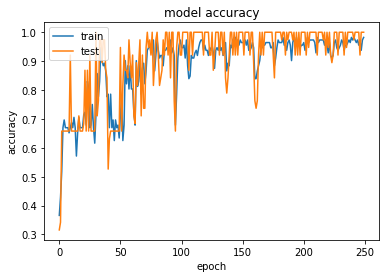

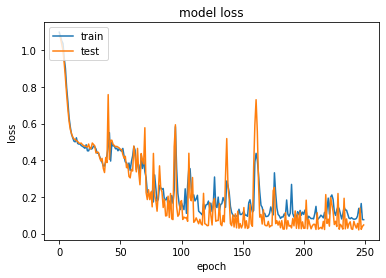

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# menampilkan histori akurasi saat training
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# menampilkan histori loss saat training
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# mengevaluasi akurasi network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=16)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=dataset.target_names))

[INFO] evaluating network...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3scene.h5')
# mengevaluasi akurasi model
_, train_acc = saved_model.evaluate(trainX, trainY, verbose=0)
_, test_acc = saved_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.973, Test: 0.974
